## 데이터 정보
- Attrition: 이직여부 (1-Yes 0-No)	
- Age: 나이	
- BusinessTravel: 출장 빈도
- Department: 현재 부서	
- DistanceFromHome: 집과 직장 사이의 거리 (마일)	
- Education: 교육수준 (1-Below College 2-College 3-Bachelor 4- Master 5-Doctor)
- EducationField: 전공	
- EmployeeNumber: 사번	
- EnvironmentSatisfaction: 근무환경에 대한 만족도 (1-Low 2-Good 3-Excellent 4-Outstanding)
- Gender: 성별	
- JobInvolvement: 직무 적극성, 참여도 (1-Low 2-Medium 3-High 4-Very High)
- JobRole: 직무	
- JobSatisfaction: 직무 만족도 (1-Low 2-Medium 3-High 4-Very High)
- MaritalStatus: 결혼상태	
- MonthlyIncome: 월급	
- NumCompaniesWorked: 현재까지 근무한 회사 수	
- OverTime: 야근 여부	
- PercentSalaryHike: 전년대비 급여 인상율 (%)	
- RelationshipSatisfaction: 동료와의 관계 만족도 (1-Low 2-Medium 3-High 4-Very High)
- StockOptionLevel: 스톡옵션 수준 (0 ~ 3)	
- TotalWorkingYears: 총 근무 연수	
- TrainingTimesLastYear: 전년 교육훈련 횟수	
- WorkLifeBalance: 워라밸, 일과 삶의 균형도 (1-Bad 2-Good 3-Better 4-Best)
- YearsAtCompany: 현 직장 근무 연수	
- YearsInCurrentRole: 현 직무 연수	
- YearsWithCurrManager: 현 팀장과 근무한 연수

## 데이터셋 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Attrition_NA.CSV'

data = pd.read_csv(path)

In [3]:
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,No,33,Travel_Rarely,Research & Development,7.0,3,Medical,817,3,Male,...,No,11,4,0,14,3,4,13,9,7
1,No,35,Travel_Frequently,Research & Development,18.0,2,Life Sciences,1412,3,Male,...,No,11,3,0,10,2,3,2,2,2
2,No,42,Travel_Rarely,Research & Development,6.0,3,Medical,1911,3,Male,...,No,13,2,1,18,3,4,13,7,7
3,No,46,Travel_Rarely,Sales,2.0,3,Marketing,1204,3,Female,...,No,23,1,0,28,2,3,26,15,9
4,No,39,Travel_Frequently,Sales,NaN,3,Life Sciences,1812,3,Male,...,No,18,4,1,7,6,3,2,1,2


## 데이터 전처리

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1250 non-null   object 
 1   Age                       1250 non-null   int64  
 2   BusinessTravel            1250 non-null   object 
 3   Department                1250 non-null   object 
 4   DistanceFromHome          1196 non-null   float64
 5   Education                 1250 non-null   int64  
 6   EducationField            1250 non-null   object 
 7   EmployeeNumber            1250 non-null   int64  
 8   EnvironmentSatisfaction   1250 non-null   int64  
 9   Gender                    1250 non-null   object 
 10  JobInvolvement            1250 non-null   int64  
 11  JobRole                   1250 non-null   object 
 12  JobSatisfaction           1250 non-null   int64  
 13  MaritalStatus             1250 non-null   object 
 14  MonthlyI

In [5]:
# 결측치 확인 
data.isna().sum()

Attrition                    0
Age                          0
BusinessTravel               0
Department                   0
DistanceFromHome            54
Education                    0
EducationField               0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
JobInvolvement               0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsWithCurrManager         0
dtype: int64

In [6]:
# 결측치 값이 소수이기에 중앙값으로 채우기 

data['DistanceFromHome'].fillna(data.groupby('Attrition')['DistanceFromHome'].transform('median'), inplace=True)
data['NumCompaniesWorked'].fillna(data.groupby('Attrition')['NumCompaniesWorked'].transform('median'), inplace=True)

In [7]:
# 확인하기 
data.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsWithCurrManager        0
dtype: int64

In [8]:
data['Attrition'].value_counts()

No     1050
Yes     200
Name: Attrition, dtype: int64

In [9]:
# target 값을 숫자로 변환 
target = 'Attrition'

data.loc[ data[target]=='Yes' , target] = 1
data.loc[ data[target]=='No' , target] = 0

In [10]:
data[target] = data[target].astype(float)

In [11]:
# 확인하기
data[target].value_counts()

0.0    1050
1.0     200
Name: Attrition, dtype: int64

In [12]:
# feature 확인
data.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

In [13]:
# x, y 데이터 구분

x = data.drop(target, axis=1)
y = data[target]

0.0    1050
1.0     200
Name: Attrition, dtype: int64


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

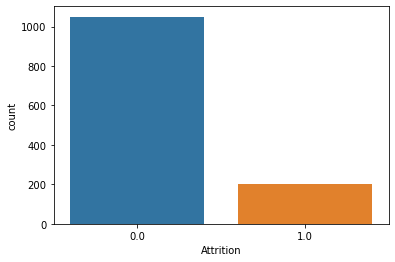

In [14]:
# target 데이터의 밸런스 확인 
print(data[target].value_counts())
sns.countplot(target, data=data)

# 데이터의 불균형이 확인 되어 우선적으로 불균형 데이터의 모델링을 진행 후 
# 시간적으로 여유가 허락된다면 균형을 맞춘 데이터의 모델링도 진행할 예정 

<AxesSubplot:>

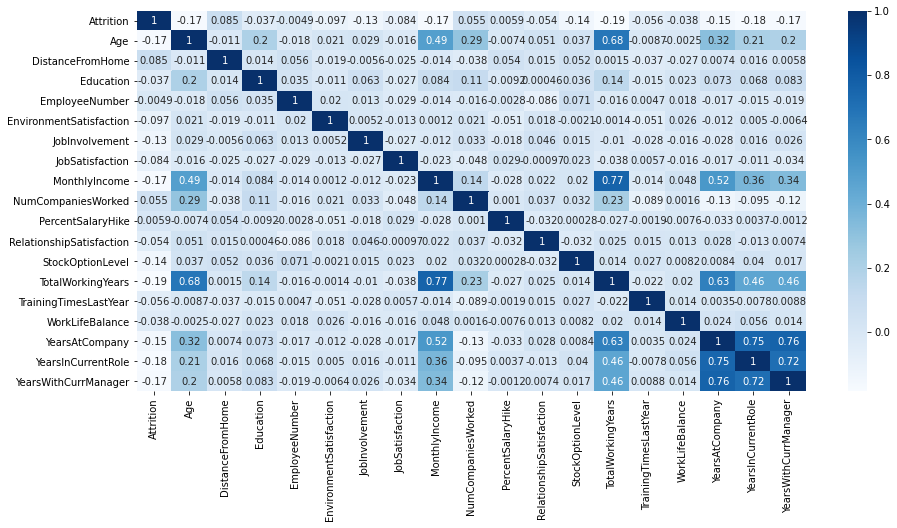

In [15]:
# 상관관계 비교 하기 ( conneted하기에 좋아보이는 것을 찾을 수 있지 않을까 ?)
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, cmap='Blues')

*** 상관관계를 보고 상관관계가 높아보이는 것들 중 실제로 깊은 연관이 있을거라 판단되는 feature들을 conneted 해보는건 어떨까 ? 
*** TotalWorkingYears - Age , YearsAtCompany - YearsInCurrentRole - YearsWithCurrManager

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1250 non-null   float64
 1   Age                       1250 non-null   int64  
 2   BusinessTravel            1250 non-null   object 
 3   Department                1250 non-null   object 
 4   DistanceFromHome          1250 non-null   float64
 5   Education                 1250 non-null   int64  
 6   EducationField            1250 non-null   object 
 7   EmployeeNumber            1250 non-null   int64  
 8   EnvironmentSatisfaction   1250 non-null   int64  
 9   Gender                    1250 non-null   object 
 10  JobInvolvement            1250 non-null   int64  
 11  JobRole                   1250 non-null   object 
 12  JobSatisfaction           1250 non-null   int64  
 13  MaritalStatus             1250 non-null   object 
 14  MonthlyI

In [17]:
# 문자열을 값으로 갖는 feature의 값 확인

print(data['BusinessTravel'].value_counts())
print('*'*70)
print(data['Department'].value_counts())
print('*'*70)
print(data['EducationField'].value_counts())
print('*'*70)
print(data['Gender'].value_counts())
print('*'*70)
print(data['JobRole'].value_counts())
print('*'*70)
print(data['MaritalStatus'].value_counts())
print('*'*70)
print(data['OverTime'].value_counts())
print('*'*70)

Travel_Rarely        892
Travel_Frequently    230
Non-Travel           128
Name: BusinessTravel, dtype: int64
**********************************************************************
Research & Development    819
Sales                     379
Human Resources            52
Name: Department, dtype: int64
**********************************************************************
Life Sciences       520
Medical             390
Marketing           137
Technical Degree    112
Other                68
Human Resources      23
Name: EducationField, dtype: int64
**********************************************************************
Male      760
Female    490
Name: Gender, dtype: int64
**********************************************************************
Sales Executive              283
Research Scientist           246
Laboratory Technician        227
Manufacturing Director       123
Healthcare Representative    110
Manager                       87
Research Director             66
Sales Representative

In [18]:
# feature의 값이 2가지의 문자열로 이루어진 값은 0, 1 로 변환 

x.loc[ x['OverTime']=='Yes' , 'OverTime'] = 1
x.loc[ x['OverTime']=='No' , 'OverTime'] = 0

x.loc[ x['Gender']=='Male' , 'Gender'] = 1
x.loc[ x['Gender']=='Female' , 'Gender'] = 0

x['OverTime'] = x['OverTime'].astype(float)
x['Gender'] = x['Gender'].astype(float)

In [19]:
# 확인하기 

print(x['Gender'].value_counts())
print(x['OverTime'].value_counts())

1.0    760
0.0    490
Name: Gender, dtype: int64
0.0    896
1.0    354
Name: OverTime, dtype: int64


In [20]:
print(x.shape)
x.columns

(1250, 25)


Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

In [21]:
# 가변수화 -> 문자열 데이터값 변경
# feature의 값이 3가지이상 가지는 feature은 가변수화 진행 
cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

x = pd.get_dummies(x, columns=cols, drop_first=False)

In [22]:
# 확인하기 

x.head(3)

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,33,7.0,3,817,3,1.0,3,3,11691,0.0,...,0,0,0,1,0,0,0,0,1,0
1,35,18.0,2,1412,3,1.0,3,4,9362,2.0,...,0,0,1,0,0,0,0,0,0,1
2,42,6.0,3,1911,3,1.0,3,1,13348,9.0,...,0,0,0,1,0,0,0,0,1,0


In [23]:
# train, test 데이터로 구분하기 
from sklearn.model_selection import train_test_split

In [24]:
# test_size= 0.2 수준으로 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

In [25]:
# 확인하기 
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1000, 44), (250, 44), (1000,), (250,))

## 모델링

1. 전처리에서 제외한 feature를 제외한, 다른 feature는 반드시 모두 사용하셔야 합니다.
2. locally connected layer를 최소 4개 이상 만드세요.
3. 모델 구조 시각화까지 해주면 좋습니다.
4. 학습 횟수는 최대 25번까지만.
---
### **locally하게 연결한 구성 의도를 반드시 상세하게 남겨주세요 (상황 가정을 해서라도!)** 
### **주석 역시 상세하게 남겨주세요**

*** 위 히트맵의 상관관계를 보고 상관관계가 높아보이는 것들 중 실제로 깊은 연관이 있을거라 판단되는 feature들을 conneted 해보는건 어떨까 ? 


*** TotalWorkingYears - Age , YearsAtCompany - YearsInCurrentRole - YearsWithCurrManager

*** 또한 위에서 가변수화를 통해 나누어진 feature들을 다시 connected하는 작업이 필요하다 생각

In [26]:
x.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', '

### Locally connected layer를 구성하기 위한 feature 설정

Travel_Rarely        892
Travel_Frequently    230
Non-Travel           128
Name: BusinessTravel, dtype: int64
**********************************************************************
Research & Development    819
Sales                     379
Human Resources            52
Name: Department, dtype: int64
**********************************************************************
Life Sciences       520
Medical             390
Marketing           137
Technical Degree    112
Other                68
Human Resources      23
Name: EducationField, dtype: int64
**********************************************************************
Male      760
Female    490
Name: Gender, dtype: int64
**********************************************************************
Sales Executive              283
Research Scientist           246
Laboratory Technician        227
Manufacturing Director       123
Healthcare Representative    110
Manager                       87
Research Director             66
Sales Representative          65
Human Resources               43
Name: JobRole, dtype: int64
**********************************************************************
Married     570
Single      404
Divorced    276
Name: MaritalStatus, dtype: int64
**********************************************************************
No     896
Yes    354
Name: OverTime, dtype: int64

In [27]:
# train 데이터 feature 설정

tr_x_others = x_train.loc[:, ['DistanceFromHome', 'Education', 'EmployeeNumber',
                              'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
                              'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
                              'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
                              'TrainingTimesLastYear', 'WorkLifeBalance', ]]
tr_x_ta = x_train.loc[:, ['Age', 'TotalWorkingYears']]
tr_x_years = x_train.loc[:, ['YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]
tr_x_travel = x_train.loc[:, ['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely']]
tr_x_depart = x_train.loc[:, ['Department_Human Resources', 'Department_Research & Development', 'Department_Sales']]
tr_x_edu = x_train.loc[:, [ 'EducationField_Human Resources', 'EducationField_Life Sciences',
                            'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 
                            'EducationField_Technical Degree']]
tr_x_role = x_train.loc[:, ['JobRole_Healthcare Representative', 'JobRole_Human Resources',
                        'JobRole_Laboratory Technician', 'JobRole_Manager',
                        'JobRole_Manufacturing Director', 'JobRole_Research Director',
                        'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative']]
tr_x_marital = x_train.loc[:, ['MaritalStatus_Divorced','MaritalStatus_Married', 'MaritalStatus_Single']]


In [28]:
# test 데이터 feature 설정

te_x_others = x_test.loc[:, ['DistanceFromHome', 'Education', 'EmployeeNumber',
                              'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
                              'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
                              'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
                              'TrainingTimesLastYear', 'WorkLifeBalance', ]]
te_x_ta = x_test.loc[:, ['Age', 'TotalWorkingYears']]
te_x_years = x_test.loc[:, ['YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]
te_x_travel = x_test.loc[:, ['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely']]
te_x_depart = x_test.loc[:, ['Department_Human Resources', 'Department_Research & Development', 'Department_Sales']]
te_x_edu = x_test.loc[:, [ 'EducationField_Human Resources', 'EducationField_Life Sciences',
                            'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 
                            'EducationField_Technical Degree']]
te_x_role = x_test.loc[:, ['JobRole_Healthcare Representative', 'JobRole_Human Resources',
                        'JobRole_Laboratory Technician', 'JobRole_Manager',
                        'JobRole_Manufacturing Director', 'JobRole_Research Director',
                        'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative']]
te_x_marital = x_test.loc[:, ['MaritalStatus_Divorced','MaritalStatus_Married', 'MaritalStatus_Single']]

In [29]:
# 변수별 input layer 만들기 이전에 노드 수 확인 
print(tr_x_others.shape, tr_x_ta.shape, tr_x_years.shape, tr_x_travel.shape, 
      tr_x_depart.shape, tr_x_edu.shape, tr_x_role.shape, tr_x_marital.shape)

(1000, 15) (1000, 2) (1000, 3) (1000, 3) (1000, 3) (1000, 6) (1000, 9) (1000, 3)


### 모델 코드 작성

In [30]:
# 라이브러리 불러오기 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Add,Concatenate

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

# 나만의 모델 

** il 레이어를 tr_x_others를 제외한 나머지 레이어를 노드 수 32의 hl 을 제공  
** Add 를 통해 결합 후 
** tr_x_others 에게도 노드 32개의 hl 제공 후 위의 레이어와 concatenate 실행   
** hl의 레이어를 한 번 더 추가하는 방식   

In [31]:
# 1 세션 클리어 
keras.backend.clear_session()

# 2 모델 엮기
il_ta = Input(shape=(2,))
hl_ta = Dense(32, activation='relu')(il_ta)

il_years = Input(shape=(3,))
hl_years = Dense(32, activation='relu')(il_years)

il_travel = Input(shape=(3,))
hl_travel = Dense(32, activation='relu')(il_travel)

il_depart = Input(shape=(3,))
hl_depart = Dense(32, activation='relu')(il_depart)

il_edu = Input(shape=(6,))
hl_edu = Dense(32, activation='relu')(il_edu)

il_role = Input(shape=(9,))
hl_role = Dense(32, activation='relu')(il_role)

il_marital = Input(shape=(3,))
hl_marital = Dense(32, activation='relu')(il_marital)

al = Add()([hl_ta, hl_years, hl_travel, hl_depart, hl_edu, hl_role, hl_marital])

il_others = Input(shape=(15,))
hl_others = Dense(32, activation='relu')(il_others)

cl = Concatenate()([al, hl_others])
hl = Dense(128, activation='relu')(cl)
ol = Dense(1, activation='sigmoid')(hl)

# 3 모델 시작과 끝 지정 
model = Model([il_ta, il_years, il_travel, il_depart, il_edu, il_role, il_marital, il_others], ol)

# 4 컴파일 
model.compile(loss=keras.losses.binary_crossentropy, metrics=['accuracy'], optimizer='adam')

# 양념 
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 3)]          0           []                               
                                                                                              

### 모델 구조 시각화

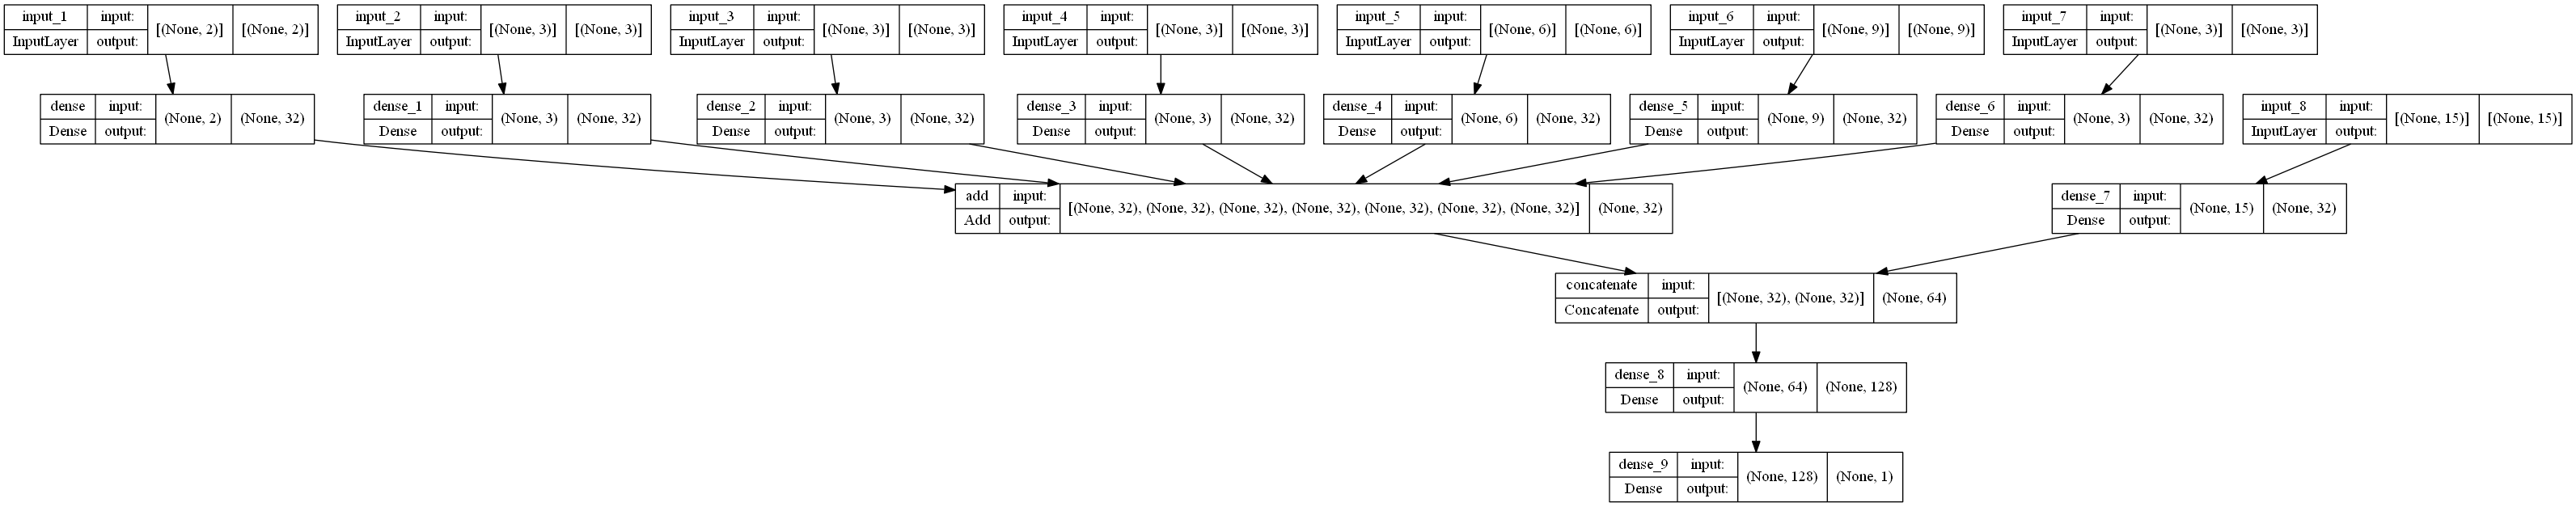

In [32]:
plot_model(model, show_shapes=True)

### 모델 학습

In [33]:
tr_list = [tr_x_ta, tr_x_years, tr_x_travel, tr_x_depart, tr_x_edu, tr_x_role, tr_x_marital, tr_x_others]

In [34]:
te_list = [te_x_ta, te_x_years, te_x_travel, te_x_depart, te_x_edu, te_x_role, te_x_marital, te_x_others]

In [35]:
# Earlystopping 값 

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=30,
                   verbose=1,
                   restore_best_weights=True)

In [36]:
# 학습하기
model.fit(tr_list, y_train, epochs=300, verbose=1, validation_split=0.15, callbacks=[es] )

Epoch 1/300
27/27 [==============================] - 1s 16ms/step - loss: 24.7075 - accuracy: 0.7565 - val_loss: 22.6273 - val_accuracy: 0.8467
Epoch 2/300
27/27 [==============================] - 0s 5ms/step - loss: 9.4583 - accuracy: 0.7659 - val_loss: 3.0896 - val_accuracy: 0.3667
Epoch 3/300
27/27 [==============================] - 0s 4ms/step - loss: 5.2392 - accuracy: 0.7329 - val_loss: 2.7659 - val_accuracy: 0.7733
Epoch 4/300
27/27 [==============================] - 0s 4ms/step - loss: 9.5622 - accuracy: 0.7353 - val_loss: 12.3695 - val_accuracy: 0.8467
Epoch 5/300
27/27 [==============================] - 0s 4ms/step - loss: 4.6727 - accuracy: 0.7435 - val_loss: 4.6789 - val_accuracy: 0.8333
Epoch 6/300
27/27 [==============================] - 0s 4ms/step - loss: 14.2492 - accuracy: 0.7635 - val_loss: 15.9454 - val_accuracy: 0.8467
Epoch 7/300
27/27 [==============================] - 0s 4ms/step - loss: 6.5624 - accuracy: 0.7624 - val_loss: 4.0314 - val_accuracy: 0.5533
Epoch 8

### 모델 예측

In [37]:
# 예측하기 
y_pred = model.predict(te_list)

y_pred[:11].reshape(-1)

array([2.1684170e-04, 1.4578968e-02, 1.9987679e-05, 9.9728131e-01,
       9.6636474e-01, 1.8826155e-07, 9.8103285e-04, 1.7803907e-04,
       3.4490067e-01, 1.2152553e-02, 8.7453045e-06], dtype=float32)

In [38]:
# 0과 1로 만들기 
for idx, val in enumerate(y_pred) :
    if y_pred[idx] >= 0.5 :
        y_pred[idx] = 1
    else :
        y_pred[idx] = 0

In [39]:
# 확인 
y_pred[:11].reshape(-1)

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [40]:
# y_test 와 비교 

y_test[:11]

133     0.0
1093    1.0
223     0.0
307     1.0
385     1.0
1040    0.0
1182    0.0
407     0.0
453     1.0
1138    1.0
561     0.0
Name: Attrition, dtype: float64

## 평가

1. 모델의 정확도를 기재하시오.
2. 이직이라 예측한 것 중 실제로 이직한 비율을 구하시오.
3. 실제 이직 데이터 중 모델이 이직이라 예측한 것의 비율을 구하시오.
4. 남는다고 예측한 것 중 실제로 남아있는 비율을 구하시오.


In [41]:
# 모델 성능 평가하기 
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score

model.evaluate(te_list, y_test)
print('-'*100)
print(classification_report(y_test,y_pred))

8/8 [==============================] - 0s 2ms/step - loss: 0.7512 - accuracy: 0.8000
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       207
         1.0       0.37      0.23      0.29        43

    accuracy                           0.80       250
   macro avg       0.61      0.58      0.58       250
weighted avg       0.77      0.80      0.78       250



In [42]:
# 성능정보 수집

score = {}
score['Locally_Connected_Model'] =[precision_score(y_test, y_pred),
                recall_score(y_test, y_pred),
                accuracy_score(y_test, y_pred)]
score

{'Locally_Connected_Model': [0.37037037037037035, 0.23255813953488372, 0.8]}

# Hidden 모델 

** hl를 점점 엮어 나갔다 돌아오는 방식으로 해보고 싶어 64, 128 , 256, 128, 64, 32 의방법으로

In [43]:
x.shape

(1250, 44)

In [44]:
# 1 세션 클리어 
keras.backend.clear_session()

# 2 모델 엮기 
il = Input(shape=(44,))
hl = Dense(64, activation='relu')(il)
hl = Dense(128, activation='relu')(hl)
hl = Dense(512, activation='relu')(hl)
hl = Dense(128, activation='relu')(hl)
hl = Dense(64, activation='relu')(hl)
hl = Dense(32, activation='relu')(hl)
ol = Dense(1, activation='sigmoid')(hl)

# 3 모델 시작 끝 선언
model = Model(il, ol)

# 4 컴파일 
model.compile(loss=keras.losses.binary_crossentropy, metrics=['accuracy'], optimizer='adam')

# 양념 
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 44)]              0         
                                                                 
 dense (Dense)               (None, 64)                2880      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 512)               66048     
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080  

### 모델 구조 시각화

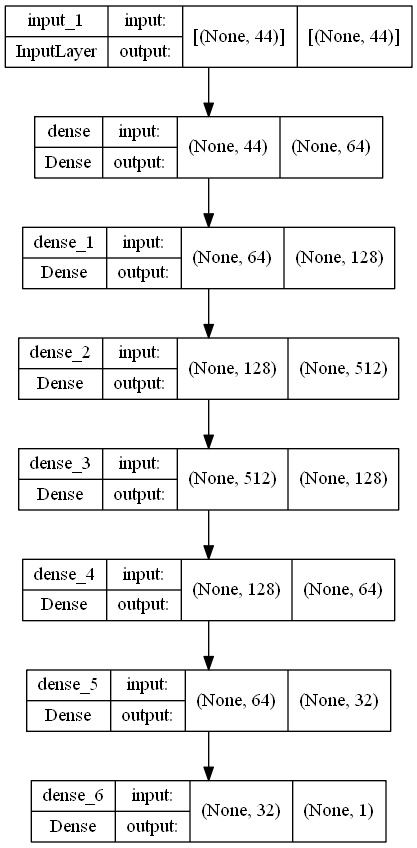

In [45]:
plot_model(model, show_shapes=True)

### 모델 학습

In [46]:
# Earlystopping 값 설정 

es = EarlyStopping(monitor='val_loss',
                   min_delta=0, 
                   patience=30,
                   verbose=1,
                   restore_best_weights=True)

In [47]:
# 모델 학습 - 학습 조건은 전부 동일하게 진행 
model.fit(x_train, y_train, epochs=300, verbose=1, validation_split=0.15, callbacks=[es] )

Epoch 1/300
27/27 [==============================] - 1s 11ms/step - loss: 10.6297 - accuracy: 0.7612 - val_loss: 1.5439 - val_accuracy: 0.8467
Epoch 2/300
27/27 [==============================] - 0s 4ms/step - loss: 2.9194 - accuracy: 0.7729 - val_loss: 3.7773 - val_accuracy: 0.8467
Epoch 3/300
27/27 [==============================] - 0s 4ms/step - loss: 1.1880 - accuracy: 0.7588 - val_loss: 1.8672 - val_accuracy: 0.8467
Epoch 4/300
27/27 [==============================] - 0s 4ms/step - loss: 0.9498 - accuracy: 0.7729 - val_loss: 0.5339 - val_accuracy: 0.8200
Epoch 5/300
27/27 [==============================] - 0s 4ms/step - loss: 0.5680 - accuracy: 0.8306 - val_loss: 0.5230 - val_accuracy: 0.8333
Epoch 6/300
27/27 [==============================] - 0s 4ms/step - loss: 1.0240 - accuracy: 0.7565 - val_loss: 0.9993 - val_accuracy: 0.8467
Epoch 7/300
27/27 [==============================] - 0s 4ms/step - loss: 0.5627 - accuracy: 0.8341 - val_loss: 0.4757 - val_accuracy: 0.8400
Epoch 8/300

Epoch 59/300
27/27 [==============================] - 0s 4ms/step - loss: 0.4251 - accuracy: 0.8459 - val_loss: 0.4654 - val_accuracy: 0.8333
Epoch 60/300
27/27 [==============================] - 0s 4ms/step - loss: 0.4185 - accuracy: 0.8459 - val_loss: 0.4741 - val_accuracy: 0.8400
Epoch 61/300
27/27 [==============================] - 0s 4ms/step - loss: 0.4208 - accuracy: 0.8471 - val_loss: 0.5025 - val_accuracy: 0.8400
Epoch 62/300
27/27 [==============================] - 0s 4ms/step - loss: 0.4235 - accuracy: 0.8400 - val_loss: 0.5017 - val_accuracy: 0.8467
Epoch 63/300
27/27 [==============================] - 0s 4ms/step - loss: 0.4358 - accuracy: 0.8435 - val_loss: 0.4925 - val_accuracy: 0.8467
Epoch 64/300
27/27 [==============================] - 0s 4ms/step - loss: 0.4319 - accuracy: 0.8400 - val_loss: 0.4812 - val_accuracy: 0.8400
Epoch 65/300
27/27 [==============================] - 0s 4ms/step - loss: 0.4371 - accuracy: 0.8424 - val_loss: 0.4576 - val_accuracy: 0.8400
Epoch 

27/27 [==============================] - 0s 4ms/step - loss: 0.4059 - accuracy: 0.8424 - val_loss: 0.4447 - val_accuracy: 0.8467
Epoch 174/300
27/27 [==============================] - 0s 5ms/step - loss: 0.4320 - accuracy: 0.8424 - val_loss: 0.4418 - val_accuracy: 0.8467
Epoch 175/300
27/27 [==============================] - 0s 5ms/step - loss: 0.4117 - accuracy: 0.8424 - val_loss: 0.4362 - val_accuracy: 0.8467
Epoch 176/300
27/27 [==============================] - 0s 4ms/step - loss: 0.4068 - accuracy: 0.8424 - val_loss: 0.4285 - val_accuracy: 0.8467
Epoch 177/300
27/27 [==============================] - 0s 4ms/step - loss: 0.4073 - accuracy: 0.8424 - val_loss: 0.4281 - val_accuracy: 0.8467
Epoch 178/300
27/27 [==============================] - 0s 4ms/step - loss: 0.4011 - accuracy: 0.8424 - val_loss: 0.4243 - val_accuracy: 0.8467
Epoch 179/300
27/27 [==============================] - 0s 4ms/step - loss: 0.3996 - accuracy: 0.8424 - val_loss: 0.4275 - val_accuracy: 0.8467
Epoch 180/300

### 모델 예측

In [48]:
# 예측하기 
y_pred = model.predict(x_test)

y_pred[:11].reshape(-1)

array([0.20462352, 0.30454987, 0.02305874, 0.34689128, 0.34662023,
       0.07202637, 0.25184965, 0.06197223, 0.26490283, 0.2814942 ,
       0.16531774], dtype=float32)

In [49]:
# 0과 1로 만들기 
for idx, val in enumerate(y_pred) :
    if y_pred[idx] >= 0.5 :
        y_pred[idx] = 1
    else :
        y_pred[idx] = 0

In [50]:
# 확인 
y_pred[:11].reshape(-1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [51]:
# y_test 와 비교 

y_test[:11]

133     0.0
1093    1.0
223     0.0
307     1.0
385     1.0
1040    0.0
1182    0.0
407     0.0
453     1.0
1138    1.0
561     0.0
Name: Attrition, dtype: float64

## 평가

1. 모델의 정확도를 기재하시오.
2. 이직이라 예측한 것 중 실제로 이직한 비율을 구하시오.
3. 실제 이직 데이터 중 모델이 이직이라 예측한 것의 비율을 구하시오.
4. 남는다고 예측한 것 중 실제로 남아있는 비율을 구하시오..

In [52]:
# 모델 성능 평가하기 
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score

model.evaluate(x_test, y_test)
### hidden layer 2개를 사용한 multilayer perceptron 구조와 비교하시오., y_test)
print('-'*100)
print(classification_report(y_test,y_pred))

8/8 [==============================] - 0s 2ms/step - loss: 0.3773 - accuracy: 0.8360
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91       207
         1.0       1.00      0.05      0.09        43

    accuracy                           0.84       250
   macro avg       0.92      0.52      0.50       250
weighted avg       0.86      0.84      0.77       250



In [53]:
# 성능정보 수집


score['Hidden_Model'] =[precision_score(y_test, y_pred),
                recall_score(y_test, y_pred),
                accuracy_score(y_test, y_pred)]
score

{'Locally_Connected_Model': [0.37037037037037035, 0.23255813953488372, 0.8],
 'Hidden_Model': [1.0, 0.046511627906976744, 0.836]}

# Original 모델

** 모든 변수와 target 만을 가지고 

In [54]:
# 1 세션 클리어 
keras.backend.clear_session()

# 2 모델 엮기 
il = Input(shape=(44,))
ol = Dense(1, activation='sigmoid')(il)

# 3 모델 시작 끝 선언
model = Model(il, ol)

# 4 컴파일 
model.compile(loss=keras.losses.binary_crossentropy, metrics=['accuracy'], optimizer='adam')

# 양념 
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 44)]              0         
                                                                 
 dense (Dense)               (None, 1)                 45        
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


### 모델 구조 시각화

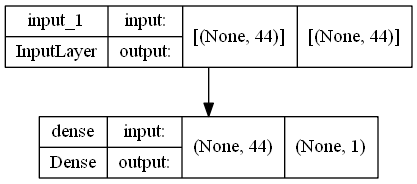

In [55]:
plot_model(model, show_shapes=True)

### 모델 학습

In [56]:
# Earlystopping 값 설정 

es = EarlyStopping(monitor='val_loss',
                   min_delta=0, 
                   patience=30,
                   verbose=1,
                   restore_best_weights=True)

In [57]:
# 모델 학습 - 학습 조건은 전부 동일하게 진행 
model.fit(x_train, y_train, epochs=300, verbose=1, validation_split=0.15, callbacks=[es] )

Epoch 1/300
27/27 [==============================] - 1s 9ms/step - loss: 774.2272 - accuracy: 0.1576 - val_loss: 700.8173 - val_accuracy: 0.1533
Epoch 2/300
27/27 [==============================] - 0s 3ms/step - loss: 595.9124 - accuracy: 0.1576 - val_loss: 517.9554 - val_accuracy: 0.1533
Epoch 3/300
27/27 [==============================] - 0s 2ms/step - loss: 417.7836 - accuracy: 0.1576 - val_loss: 331.4795 - val_accuracy: 0.1533
Epoch 4/300
27/27 [==============================] - 0s 3ms/step - loss: 237.9608 - accuracy: 0.1576 - val_loss: 146.2471 - val_accuracy: 0.1533
Epoch 5/300
27/27 [==============================] - 0s 2ms/step - loss: 65.0098 - accuracy: 0.2682 - val_loss: 8.1570 - val_accuracy: 0.6667
Epoch 6/300
27/27 [==============================] - 0s 2ms/step - loss: 6.5952 - accuracy: 0.7706 - val_loss: 8.6077 - val_accuracy: 0.7600
Epoch 7/300
27/27 [==============================] - 0s 3ms/step - loss: 6.1944 - accuracy: 0.7894 - val_loss: 7.0970 - val_accuracy: 0.7

Epoch 116/300
27/27 [==============================] - 0s 2ms/step - loss: 0.3577 - accuracy: 0.8541 - val_loss: 0.6136 - val_accuracy: 0.8600
Epoch 117/300
27/27 [==============================] - 0s 2ms/step - loss: 0.3794 - accuracy: 0.8400 - val_loss: 0.7656 - val_accuracy: 0.8600
Epoch 118/300
27/27 [==============================] - 0s 2ms/step - loss: 0.3793 - accuracy: 0.8494 - val_loss: 0.4028 - val_accuracy: 0.8667
Epoch 119/300
27/27 [==============================] - 0s 2ms/step - loss: 0.3441 - accuracy: 0.8659 - val_loss: 0.7425 - val_accuracy: 0.8600
Epoch 120/300
27/27 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.8329 - val_loss: 0.4298 - val_accuracy: 0.8733
Epoch 121/300
27/27 [==============================] - 0s 2ms/step - loss: 0.3651 - accuracy: 0.8612 - val_loss: 0.4538 - val_accuracy: 0.7600
Epoch 122/300
27/27 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8400 - val_loss: 0.3994 - val_accuracy: 0.8400

27/27 [==============================] - 0s 3ms/step - loss: 0.4125 - accuracy: 0.8482 - val_loss: 0.3953 - val_accuracy: 0.9067
Epoch 231/300
27/27 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.8706 - val_loss: 0.3957 - val_accuracy: 0.8867
Epoch 231: early stopping


### 모델 예측

In [58]:
# 예측하기 
y_pred = model.predict(x_test)

y_pred[:11].reshape(-1)

array([0.28467783, 0.58368576, 0.00306055, 0.7849058 , 0.36191255,
       0.00235197, 0.4066719 , 0.03551418, 0.59584093, 0.91492486,
       0.0894891 ], dtype=float32)

In [59]:
# 0과 1로 만들기 
for idx, val in enumerate(y_pred) :
    if y_pred[idx] >= 0.5 :
        y_pred[idx] = 1
    else :
        y_pred[idx] = 0

In [60]:
# 확인 
y_pred[:11].reshape(-1)

array([0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.], dtype=float32)

In [61]:
# y_test 와 비교 

y_test[:11]

133     0.0
1093    1.0
223     0.0
307     1.0
385     1.0
1040    0.0
1182    0.0
407     0.0
453     1.0
1138    1.0
561     0.0
Name: Attrition, dtype: float64

## 평가

1. 모델의 정확도를 기재하시오.
2. 이직이라 예측한 것 중 실제로 이직한 비율을 구하시오.
3. 실제 이직 데이터 중 모델이 이직이라 예측한 것의 비율을 구하시오.
4. 남는다고 예측한 것 중 실제로 남아있는 비율을 구하시오..

In [62]:
# 모델 성능 평가하기 
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score

model.evaluate(x_test, y_test)
print('-'*100)
print(classification_report(y_test,y_pred))

8/8 [==============================] - 0s 1ms/step - loss: 0.3628 - accuracy: 0.8760
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       207
         1.0       0.71      0.47      0.56        43

    accuracy                           0.88       250
   macro avg       0.81      0.71      0.75       250
weighted avg       0.87      0.88      0.87       250



In [63]:
# 성능정보 수집


score['Origonal_Model'] =[precision_score(y_test, y_pred),
                recall_score(y_test, y_pred),
                accuracy_score(y_test, y_pred)]
score

{'Locally_Connected_Model': [0.37037037037037035, 0.23255813953488372, 0.8],
 'Hidden_Model': [1.0, 0.046511627906976744, 0.836],
 'Origonal_Model': [0.7142857142857143, 0.46511627906976744, 0.876]}

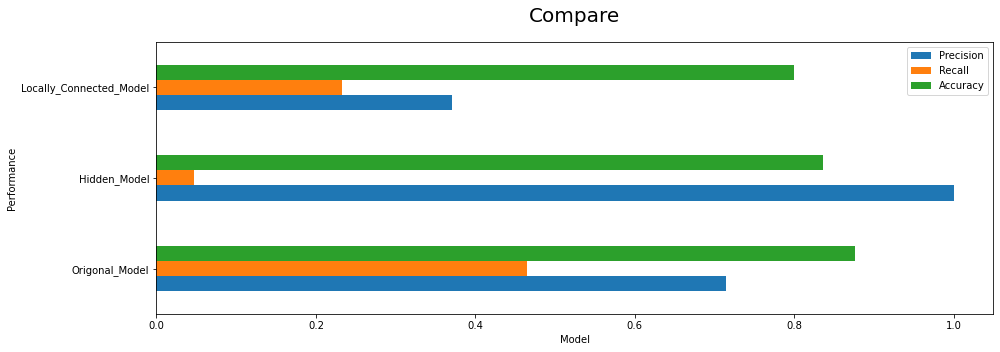

In [64]:
# over-sampling 이전에 모델들간의 비교 

tmp = pd.DataFrame.from_dict(score, orient='index', columns=['Precision', 'Recall', 'Accuracy'])
tmp.sort_values(by='Accuracy', ascending=False, inplace=True)
tmp.plot(kind='barh')
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.title('Compare', size=20, pad=20)
plt.xlabel('Model')
plt.ylabel('Performance')
plt.show()

## OVER smapling 실행

In [65]:
data.head()
print(data.isna().sum())

Attrition                   0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsWithCurrManager        0
dtype: int64


In [66]:
x_o = data.drop(target, axis=1)
y_o = data[target]

x_o.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,33,Travel_Rarely,Research & Development,7.0,3,Medical,817,3,Male,3,...,No,11,4,0,14,3,4,13,9,7
1,35,Travel_Frequently,Research & Development,18.0,2,Life Sciences,1412,3,Male,3,...,No,11,3,0,10,2,3,2,2,2
2,42,Travel_Rarely,Research & Development,6.0,3,Medical,1911,3,Male,3,...,No,13,2,1,18,3,4,13,7,7
3,46,Travel_Rarely,Sales,2.0,3,Marketing,1204,3,Female,3,...,No,23,1,0,28,2,3,26,15,9
4,39,Travel_Frequently,Sales,7.0,3,Life Sciences,1812,3,Male,3,...,No,18,4,1,7,6,3,2,1,2


### 위와 동일하게 문자열값을 가지는 feature 변환 작업

In [67]:
x_o.loc[ x_o['OverTime']=='Yes' , 'OverTime'] = 1
x_o.loc[ x_o['OverTime']=='No' , 'OverTime'] = 0

x_o.loc[ x_o['Gender']=='Male' , 'Gender'] = 1
x_o.loc[ x_o['Gender']=='Female' , 'Gender'] = 0

x_o['OverTime'] = x_o['OverTime'].astype(float)
x_o['Gender'] = x_o['Gender'].astype(float)

In [68]:
cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

x_o = pd.get_dummies(x_o, columns=cols, drop_first=False)

In [69]:
# 확인하기 
x_o.head()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,33,7.0,3,817,3,1.0,3,3,11691,0.0,...,0,0,0,1,0,0,0,0,1,0
1,35,18.0,2,1412,3,1.0,3,4,9362,2.0,...,0,0,1,0,0,0,0,0,0,1
2,42,6.0,3,1911,3,1.0,3,1,13348,9.0,...,0,0,0,1,0,0,0,0,1,0
3,46,2.0,3,1204,3,0.0,3,1,17048,8.0,...,0,1,0,0,0,0,0,0,1,0
4,39,7.0,3,1812,3,1.0,3,4,4127,2.0,...,0,0,0,0,0,1,0,1,0,0


In [70]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2022)
x_over, y_over = smote.fit_resample(x_o,y_o)

In [71]:
x_over.shape, y_over.shape

((2100, 44), (2100,))

In [72]:
y_over.value_counts()

0.0    1050
1.0    1050
Name: Attrition, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split


In [74]:
x_tr, x_te, y_tr, y_te = train_test_split(x_over, y_over, test_size=0.2, random_state=2022)

In [75]:
x_tr.shape, x_te.shape

((1680, 44), (420, 44))

# Original 모델사용

** 앞서 확인한 결과에서 Original 모델이 가장 높은 성능을 보였기에 사용하기로 정함.

In [76]:
# 1 세션 클리어 
keras.backend.clear_session()

# 2 모델 엮기 
il = Input(shape=(44,))
ol = Dense(1, activation='sigmoid')(il)

# 3 모델 시작 끝 선언
model = Model(il, ol)

# 4 컴파일 
model.compile(loss=keras.losses.binary_crossentropy, metrics=['accuracy'], optimizer='adam')

# 양념 
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 44)]              0         
                                                                 
 dense (Dense)               (None, 1)                 45        
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


### 모델 구조 시각화

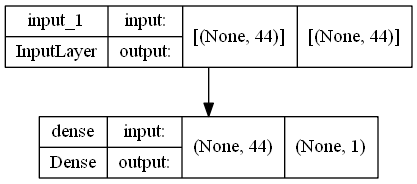

In [77]:
plot_model(model, show_shapes=True)

### 모델 학습

In [78]:
# Earlystopping 값 설정 

es = EarlyStopping(monitor='val_loss',
                   min_delta=0, 
                   patience=30,
                   verbose=1,
                   restore_best_weights=True)

In [79]:
# 모델 학습 - 학습 조건은 전부 동일하게 진행 
model.fit(x_tr, y_tr, epochs=300, verbose=1, validation_split=0.15, callbacks=[es] )

Epoch 1/300
45/45 [==============================] - 1s 5ms/step - loss: 125.9892 - accuracy: 0.4769 - val_loss: 101.7763 - val_accuracy: 0.4325
Epoch 2/300
45/45 [==============================] - 0s 2ms/step - loss: 93.0608 - accuracy: 0.4489 - val_loss: 86.8944 - val_accuracy: 0.4365
Epoch 3/300
45/45 [==============================] - 0s 2ms/step - loss: 77.4039 - accuracy: 0.4426 - val_loss: 71.1766 - val_accuracy: 0.4286
Epoch 4/300
45/45 [==============================] - 0s 2ms/step - loss: 61.6868 - accuracy: 0.4447 - val_loss: 54.2594 - val_accuracy: 0.4484
Epoch 5/300
45/45 [==============================] - 0s 2ms/step - loss: 46.0015 - accuracy: 0.4524 - val_loss: 37.6386 - val_accuracy: 0.4286
Epoch 6/300
45/45 [==============================] - 0s 2ms/step - loss: 28.9461 - accuracy: 0.4524 - val_loss: 23.0051 - val_accuracy: 0.4325
Epoch 7/300
45/45 [==============================] - 0s 2ms/step - loss: 13.6525 - accuracy: 0.4580 - val_loss: 5.4710 - val_accuracy: 0.472

Epoch 116/300
45/45 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.8599 - val_loss: 0.3629 - val_accuracy: 0.8810
Epoch 117/300
45/45 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.8725 - val_loss: 0.4283 - val_accuracy: 0.7738
Epoch 118/300
45/45 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.8522 - val_loss: 0.3029 - val_accuracy: 0.8770
Epoch 119/300
45/45 [==============================] - 0s 2ms/step - loss: 0.3023 - accuracy: 0.8761 - val_loss: 0.2838 - val_accuracy: 0.9167
Epoch 120/300
45/45 [==============================] - 0s 2ms/step - loss: 0.2874 - accuracy: 0.8845 - val_loss: 0.3148 - val_accuracy: 0.8611
Epoch 121/300
45/45 [==============================] - 0s 2ms/step - loss: 0.3416 - accuracy: 0.8536 - val_loss: 0.5231 - val_accuracy: 0.8254
Epoch 122/300
45/45 [==============================] - 0s 2ms/step - loss: 0.3701 - accuracy: 0.8473 - val_loss: 0.2832 - val_accuracy: 0.9206

45/45 [==============================] - 0s 2ms/step - loss: 0.2696 - accuracy: 0.8845 - val_loss: 0.3016 - val_accuracy: 0.8651
Epoch 231/300
45/45 [==============================] - 0s 2ms/step - loss: 0.3002 - accuracy: 0.8704 - val_loss: 0.3088 - val_accuracy: 0.8690
Epoch 232/300
45/45 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.8845 - val_loss: 0.2683 - val_accuracy: 0.9087
Epoch 233/300
45/45 [==============================] - 0s 2ms/step - loss: 0.2662 - accuracy: 0.8908 - val_loss: 0.2972 - val_accuracy: 0.9127
Epoch 234/300
45/45 [==============================] - 0s 2ms/step - loss: 0.2507 - accuracy: 0.8992 - val_loss: 0.2614 - val_accuracy: 0.9206
Epoch 235/300
45/45 [==============================] - 0s 2ms/step - loss: 0.2503 - accuracy: 0.9020 - val_loss: 0.4233 - val_accuracy: 0.8016
Epoch 236/300
45/45 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8536 - val_loss: 0.3998 - val_accuracy: 0.7937
Epoch 237/300

### 모델 예측

In [80]:
# 예측하기 
y_pre = model.predict(x_te)

y_pre[:11].reshape(-1)

array([0.9974522 , 0.04976714, 0.64021325, 0.10748732, 0.7334446 ,
       0.71856135, 0.0017961 , 0.08549806, 0.8360426 , 0.03774756,
       0.6945177 ], dtype=float32)

In [81]:
# 0과 1로 만들기 
for idx, val in enumerate(y_pre) :
    if y_pre[idx] >= 0.5 :
        y_pre[idx] = 1
    else :
        y_pre[idx] = 0

In [82]:
# 확인 
y_pre[:11].reshape(-1)

array([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.], dtype=float32)

In [83]:
# y_test 와 비교 

y_te[:11]

1397    1.0
36      0.0
1367    1.0
86      0.0
1971    1.0
626     1.0
39      0.0
81      0.0
2010    1.0
837     0.0
1324    1.0
Name: Attrition, dtype: float64

## 평가

1. 모델의 정확도를 기재하시오.
2. 이직이라 예측한 것 중 실제로 이직한 비율을 구하시오.
3. 실제 이직 데이터 중 모델이 이직이라 예측한 것의 비율을 구하시오.
4. 남는다고 예측한 것 중 실제로 남아있는 비율을 구하시오..

In [84]:
# 모델 성능 평가하기 
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score

model.evaluate(x_te, y_te)
print('-'*100)
print(classification_report(y_te,y_pre))

14/14 [==============================] - 0s 2ms/step - loss: 0.2629 - accuracy: 0.9048
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91       205
         1.0       0.94      0.87      0.90       215

    accuracy                           0.90       420
   macro avg       0.91      0.91      0.90       420
weighted avg       0.91      0.90      0.90       420



In [87]:
# 성능정보 수집


score['Oversampling_Original_Model'] =[precision_score(y_te, y_pre),
                                       recall_score(y_te, y_pre),
                                       accuracy_score(y_te, y_pre)]
score

{'Locally_Connected_Model': [0.37037037037037035, 0.23255813953488372, 0.8],
 'Hidden_Model': [1.0, 0.046511627906976744, 0.836],
 'Origonal_Model': [0.7142857142857143, 0.46511627906976744, 0.876],
 'Oversampling_Original_Model': [0.9353233830845771,
  0.8744186046511628,
  0.9047619047619048]}

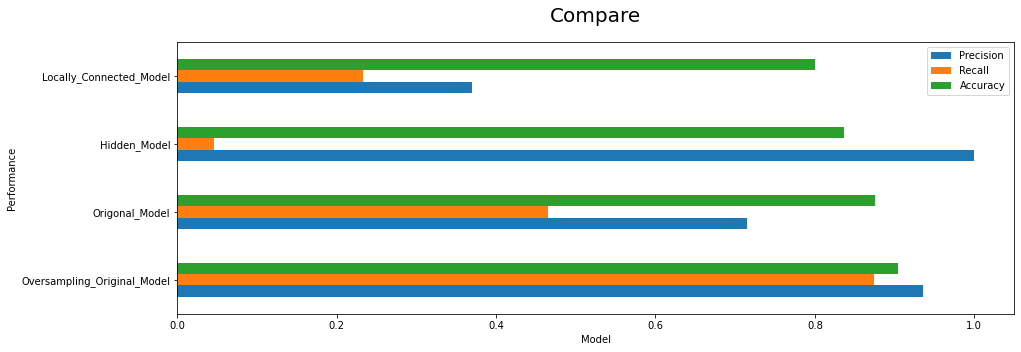

In [89]:
# 진행한 4가지의 모델의 성능을 비교 

tmp = pd.DataFrame.from_dict(score, orient='index', columns=['Precision', 'Recall', 'Accuracy'])
tmp.sort_values(by='Accuracy', ascending=False, inplace=True)
tmp.plot(kind='barh')
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.title('Compare', size=20, pad=20)
plt.xlabel('Model')
plt.ylabel('Performance')
plt.show()

### 총평 

* oversampling을 통해 데이터의 균형을 어느정도 맞추면 ML뿐만 아니라 DL에서도 어느정도 성능이 상향되는 것을 확인  
* 기본적으로 데이터가 잘 갈무리 되어져 있어서 추가적으로 hidden layer를 사용할수록 Accuracy의 값이 떨어진다.
* 나만의 모델에서 가장 낮은 성능을 보인 것으로 보아 feature를 엮는 부분에서 다시 한 번 수정해서 진행해 볼 필요